<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [28]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [29]:
# YOUR CODE
data[target_col].value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

In [30]:
def fix_total_spent(ts):
    try:
        ts = float(ts)
        return ts
    except ValueError as e:
        return np.nan
    

In [31]:
data['TotalSpent'] = data['TotalSpent'].apply(fix_total_spent)

In [32]:
ls = []
for column in feature_cols:
    column_na_n = np.sum(data[column].isna())
    ls.append((column, column_na_n))
nan_df_count = pd.DataFrame(ls, columns=['column_name', 'n_nan'])
nan_df_count

,column_name,n_nan
0,ClientPeriod,0
1,MonthlySpending,0
2,TotalSpent,0
3,Sex,0
4,IsSeniorCitizen,0
5,HasPartner,0
6,HasChild,0
7,HasPhoneService,0
8,HasMultiplePhoneNumbers,0
9,HasInternetService,0


In [33]:
data = data.fillna(data.mean())

In [34]:
ls = []
for column in feature_cols:
    column_na_n = np.sum(data[column].isna())
    ls.append((column, column_na_n))
nan_df_count = pd.DataFrame(ls, columns=['column_name', 'n_nan'])
nan_df_count

,column_name,n_nan
0,ClientPeriod,0
1,MonthlySpending,0
2,TotalSpent,0
3,Sex,0
4,IsSeniorCitizen,0
5,HasPartner,0
6,HasChild,0
7,HasPhoneService,0
8,HasMultiplePhoneNumbers,0
9,HasInternetService,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

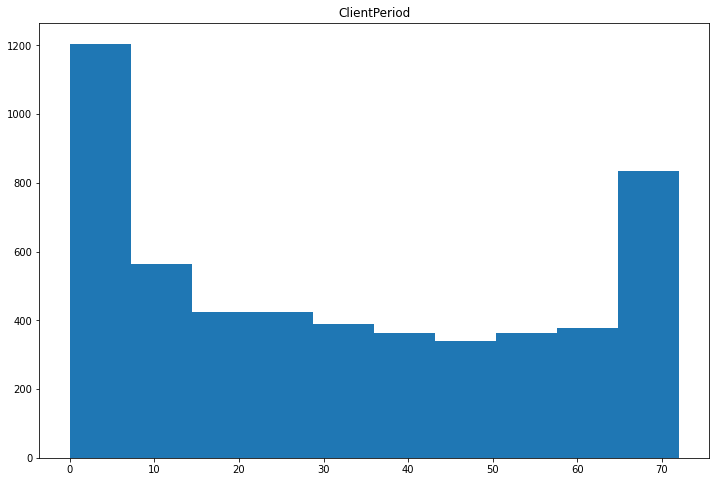

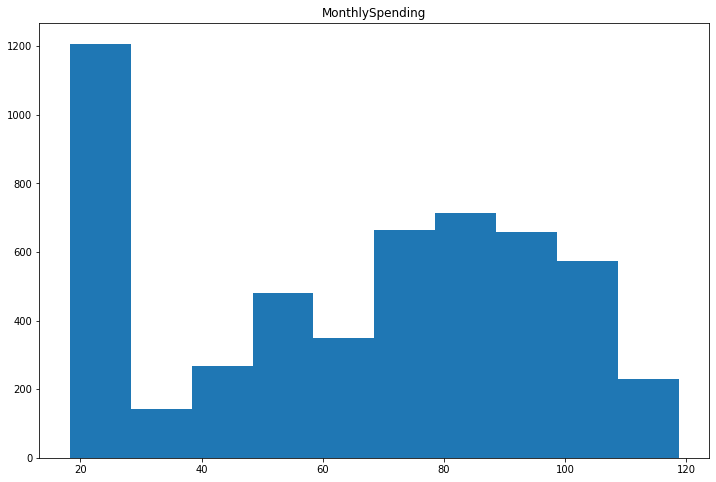

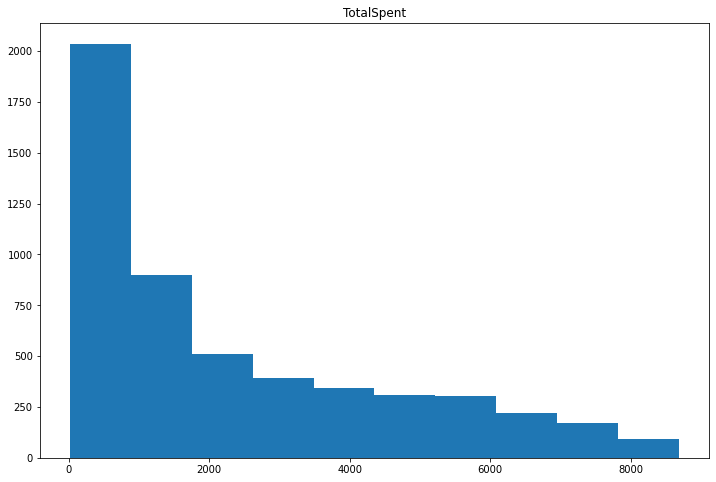

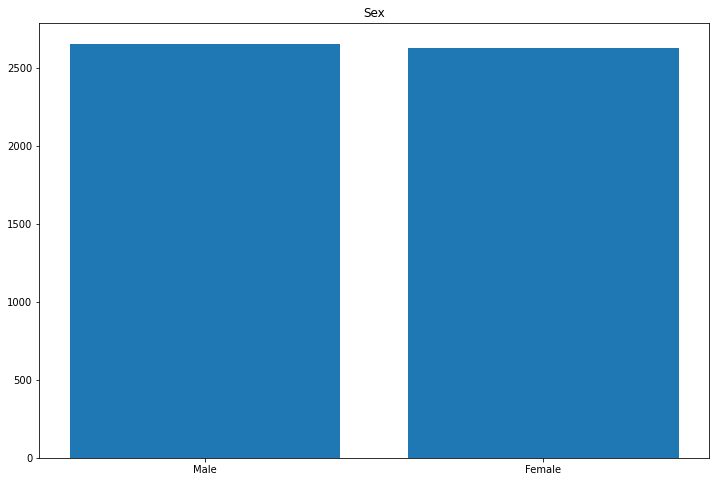

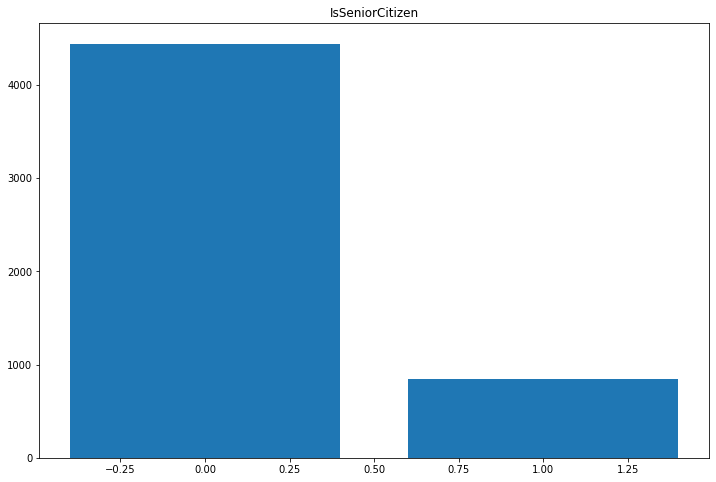

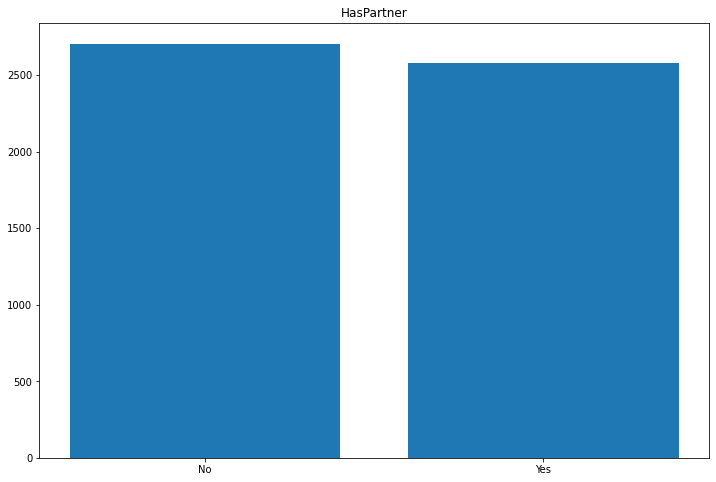

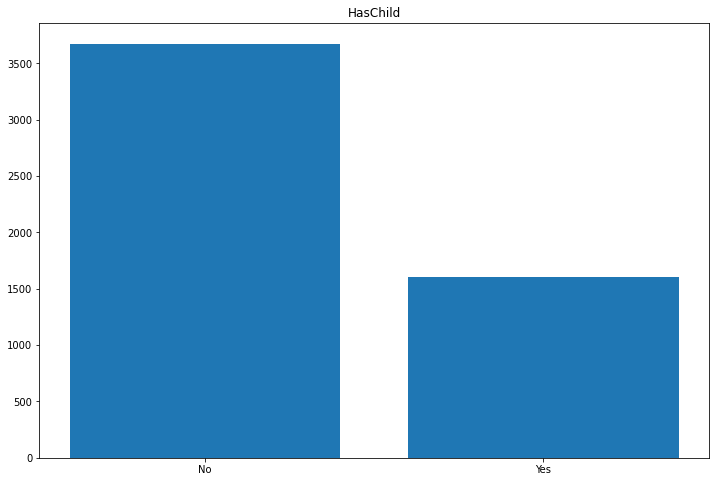

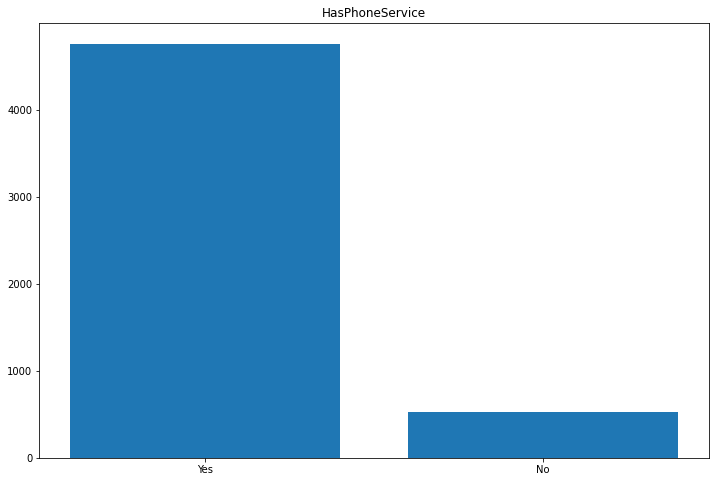

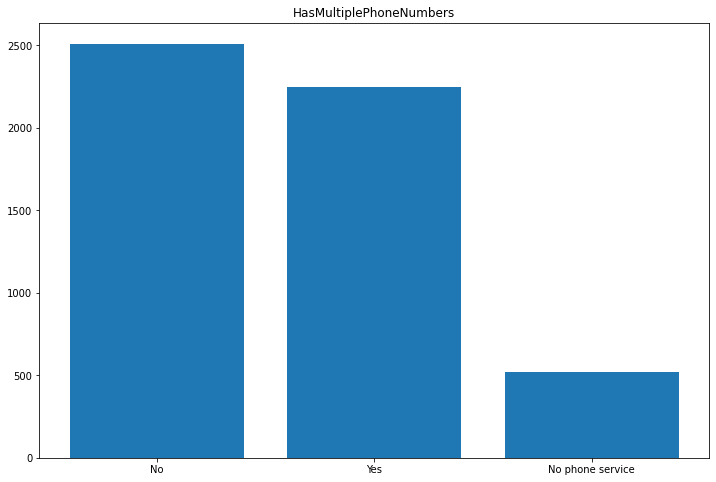

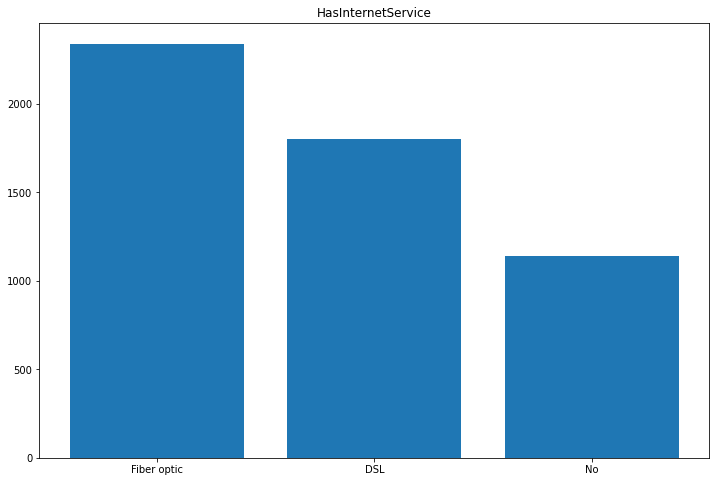

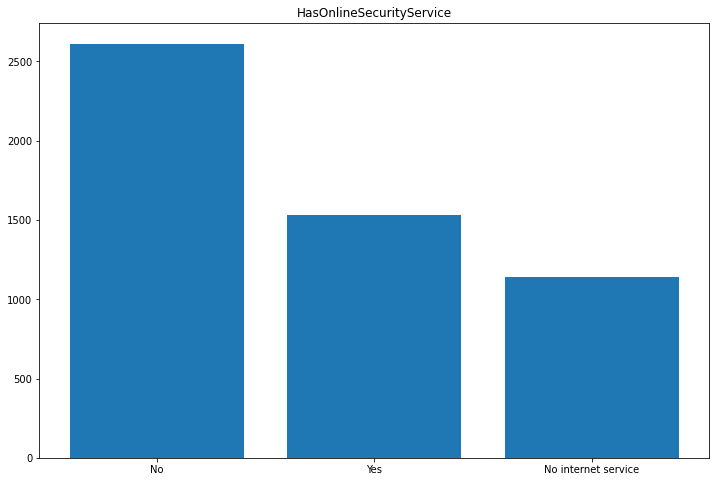

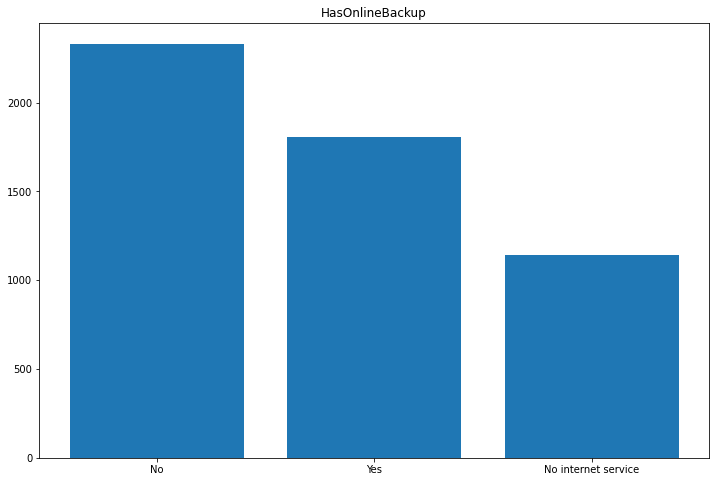

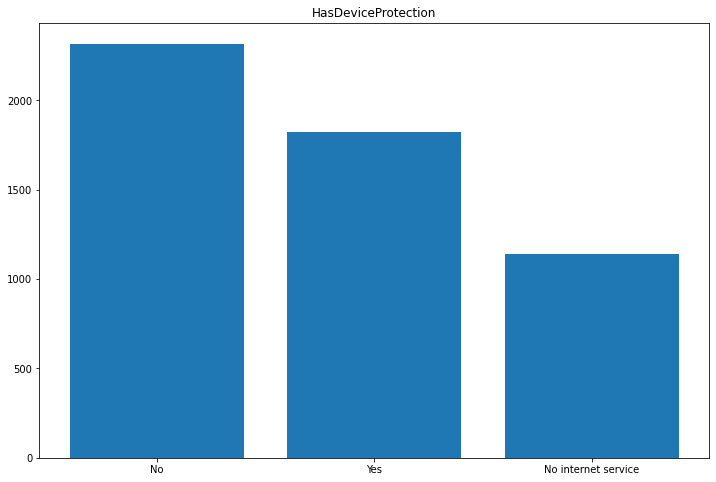

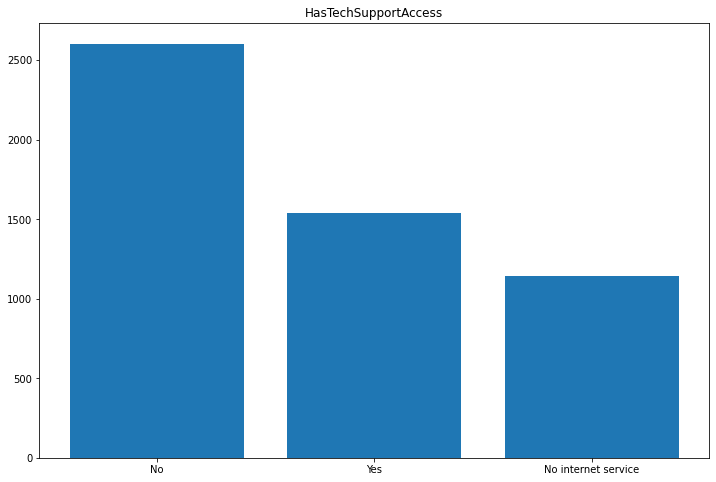

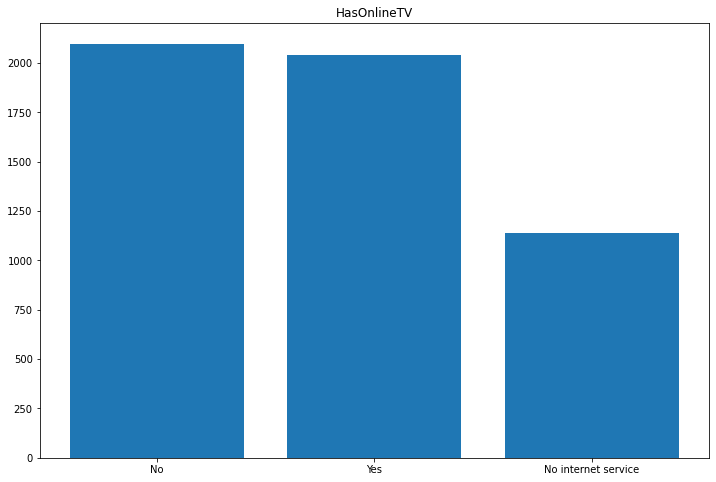

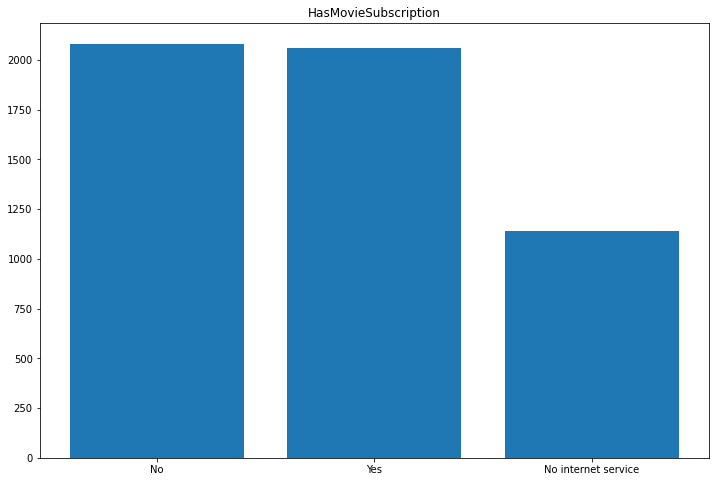

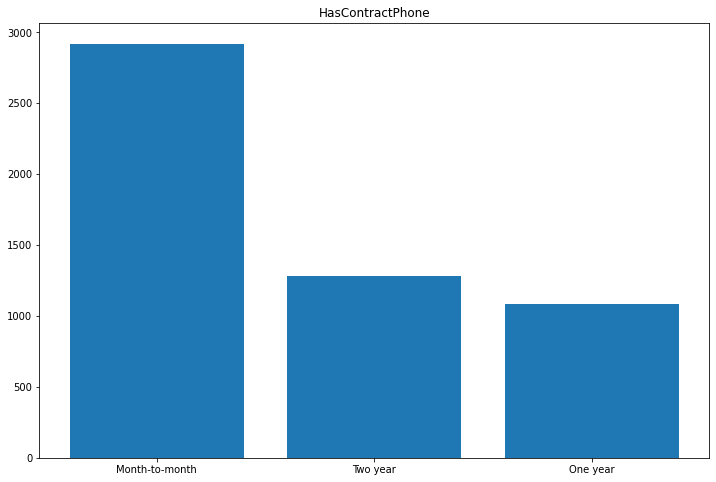

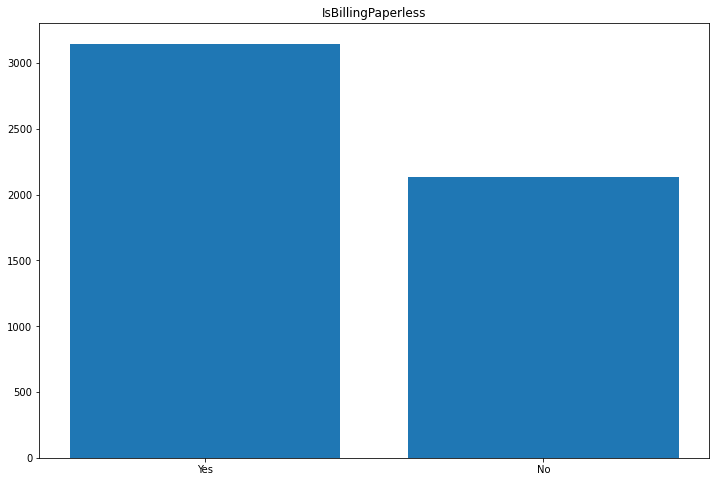

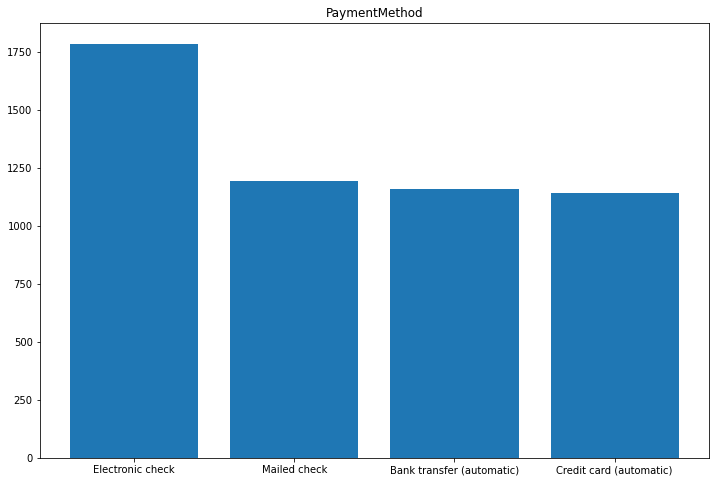

In [35]:
# YOUR CODE
def plot_num_col(data, colum_name):
    plt.figure(figsize=(12,8))
    plt.title(colum_name)
    plt.hist(data[colum_name])
    plt.show()

def plot_cat_col(data, column_name):
    plt.figure(figsize=(12,8))
    plt.title(column_name)
    dfc = data[column_name].value_counts().reset_index()
    plt.bar(dfc['index'], dfc[column_name])
    plt.show()

for x in feature_cols:
    if x in num_cols:
        plot_num_col(data, x)
    if x in cat_cols:
        plot_cat_col(data, x)
plt.show()

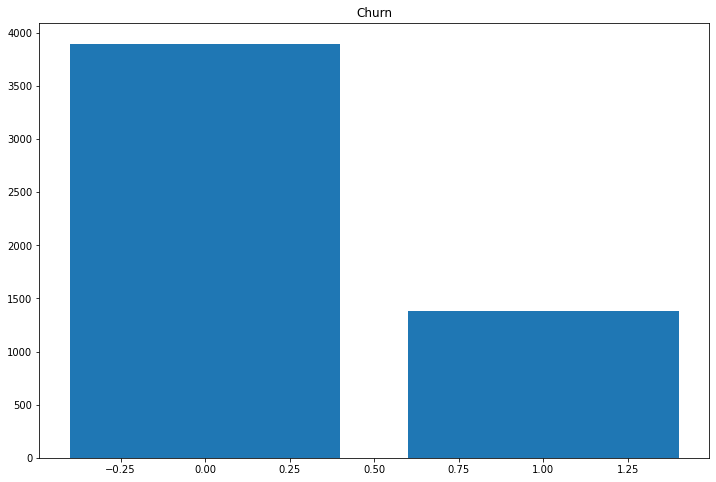

In [36]:
plot_cat_col(data, target_col)

## Target class is not balanced

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [37]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [38]:
# YOUR CODE
train_df, test_df = train_test_split(data, test_size=0.2)

In [39]:
y_train = train_df[target_col]
y_test = test_df[target_col]

In [40]:
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(train_df[num_cols])
X_test_num = scaler.transform(test_df[num_cols])

In [41]:
encoder = OneHotEncoder()
X_train_cat = encoder.fit_transform(train_df[cat_cols])
X_test_cat = encoder.transform(test_df[cat_cols])

In [42]:
X_test_cat.shape, X_test_num.shape

((1057, 43), (1057, 3))

In [43]:
X_train = np.hstack([X_train_num, X_train_cat.todense()])
X_test = np.hstack([X_test_num, X_test_cat.todense()])

In [44]:
best_score = -1
best_c = None
for c in np.logspace(-4, 2, 7):
    clf = LogisticRegression(C=c)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    new_score = roc_auc_score(y_test, y_pred)
    if new_score > best_score:
        best_score = new_score
        best_c = c
print(f'Best score: {best_score}, with C={best_c}')

Best score: 0.8362139324979595, with C=100.0


/Users/shinkovskiymichael/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [45]:
# YOUR CODE
from catboost import CatBoostClassifier

In [46]:
clf = CatBoostClassifier(iterations=2000)
clf = clf.fit(train_df[feature_cols], train_df[target_col], cat_features=cat_cols)

Learning rate set to 0.010095
0:	learn: 0.6862905	total: 6.16ms	remaining: 12.3s
1:	learn: 0.6802514	total: 14.3ms	remaining: 14.3s
2:	learn: 0.6740797	total: 20.8ms	remaining: 13.8s
3:	learn: 0.6685637	total: 27.1ms	remaining: 13.5s
4:	learn: 0.6626937	total: 33.5ms	remaining: 13.4s
5:	learn: 0.6565646	total: 39.6ms	remaining: 13.1s
6:	learn: 0.6501817	total: 47.1ms	remaining: 13.4s
7:	learn: 0.6450213	total: 51.3ms	remaining: 12.8s
8:	learn: 0.6391944	total: 57.5ms	remaining: 12.7s
9:	learn: 0.6335252	total: 63.4ms	remaining: 12.6s
10:	learn: 0.6283971	total: 69.5ms	remaining: 12.6s
11:	learn: 0.6236615	total: 73.3ms	remaining: 12.1s
12:	learn: 0.6191514	total: 76.8ms	remaining: 11.7s
13:	learn: 0.6143117	total: 83.1ms	remaining: 11.8s
14:	learn: 0.6090450	total: 88.3ms	remaining: 11.7s
15:	learn: 0.6041892	total: 94.9ms	remaining: 11.8s
16:	learn: 0.5995962	total: 100ms	remaining: 11.7s
17:	learn: 0.5949459	total: 107ms	remaining: 11.8s
18:	learn: 0.5909872	total: 113ms	remaining: 1

In [47]:
y_pred = clf.predict_proba(test_df[feature_cols])[:, 1]

In [48]:
roc_auc_score(y_test, y_pred)

0.8375894185990687

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [49]:
clf = LogisticRegression(C=100)
full_train_num = scaler.fit_transform(data[num_cols])
full_train_cat = encoder.fit_transform(data[cat_cols])
full_train = np.hstack([full_train_num, full_train_cat.todense()])
y_train = data[target_col]
best_model = clf.fit(full_train, y_train)

In [50]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
X_test['TotalSpent'] = X_test['TotalSpent'].apply(fix_total_spent)
X_test = X_test.fillna(X_test.mean())


In [51]:

X_test_num = scaler.transform(X_test[num_cols])
X_test_cat = encoder.transform(X_test[cat_cols])
X_test = np.hstack([X_test_num, X_test_cat.todense()])
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=None)

![alt text](score_kaggle.png "Title")

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.